In [3]:
import site
site.addsitedir('..')
import menpo.io as mio
import menpodetect
import numpy as np
import facefit
import hickle
%matplotlib inline
from facefit import esr, ert, lbf
from facefit.test import fit_all
from facefit.test.end2end import test_model
from facefit import util

In [6]:
esr_model = hickle.load("../models/esr_lfpw_helen.hkl", safe=False)
ert_model = hickle.load("../models/ert_lfpw_helen.hkl", safe=False)
lbf_fast_model = hickle.load("../models/lbf-fast_lfpw+helen.hkl", safe=False)

In [5]:
lfpw_test = util.read_images("../datasets/lfpw/testset/", normalise=True)
helen_test = util.read_images("../datasets/helen_cropped/testset_cropped/", normalise=True)
test_images = np.concatenate([lfpw_test, helen_test])

- Loading 330 assets: [====================] 100%

In [48]:
lfpw_gt_shapes = util.get_gt_shapes(lfpw_test)
helen_gt_shapes = util.get_gt_shapes(helen_test)

In [53]:
esr_initerr, esr_finerr, _, esr_shapes = test_model(esr_model, lfpw_test, 5)

224/224ng face 223/224

In [54]:
print "Mean initial error: {}".format(np.mean(esr_initerr))
print "Mean final error: {}".format(np.mean(esr_finerr))

Mean initial error: 0.102570194775
Mean final error: 0.0230739874073


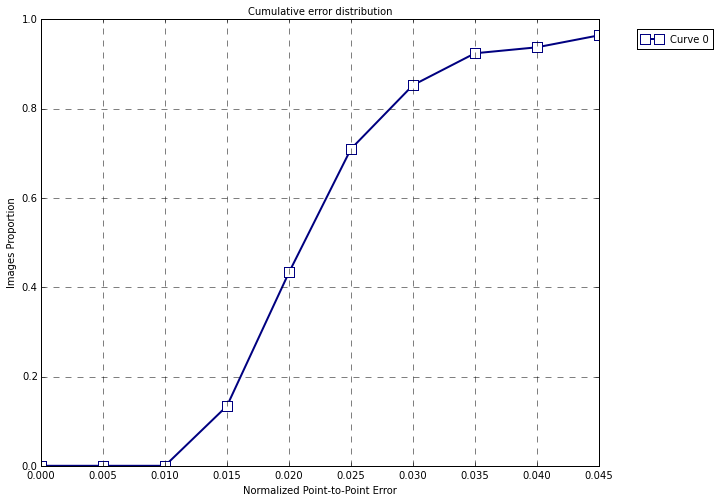

In [55]:
from menpofit.visualize import plot_ced
plot_ced(esr_finerr)

In [18]:
ert_initerr, ert_finerr, _, ert_shapes = test_model(ert_model, lfpw_test, 5)

224/224ng face 223/224

In [51]:
(0.0234185059366-0.0227215150235) / 0.0234185059366 * 100.0

2.9762398804899677

In [19]:
print "Mean initial error: {}".format(np.mean(ert_initerr))
print "Mean final error: {}".format(np.mean(ert_finerr))

Mean initial error: 0.102570194775
Mean final error: 0.0227215150235


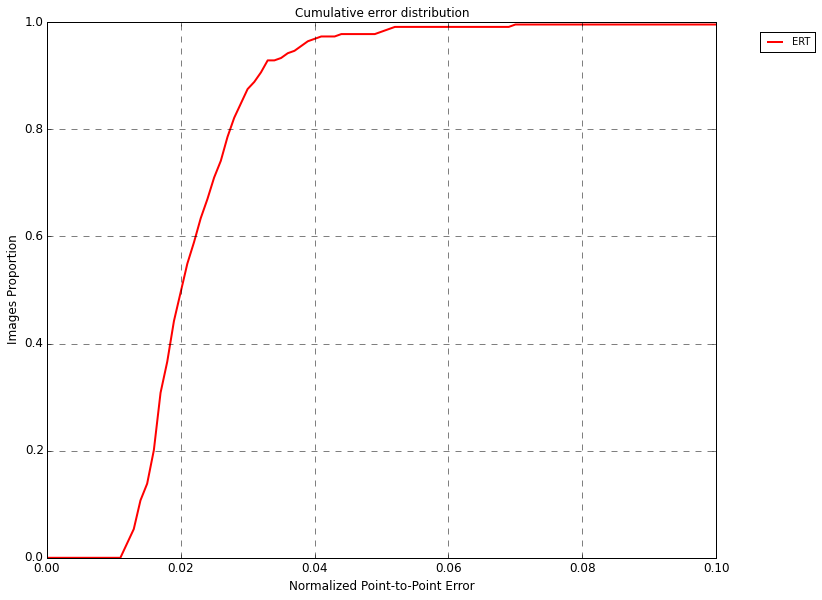

In [20]:
from menpofit.visualize import plot_ced
plot_ced(ert_finerr)

In [27]:
lbf_fast_initerr, lbf_fast_finerr, _, lbf_fast_shapes = test_model(lbf_fast_model, lfpw_test, 1)

224/224ng face 223/224

In [28]:
print "Mean initial error: {}".format(np.mean(lbf_fast_initerr))
print "Mean final error: {}".format(np.mean(lbf_fast_finerr))

Mean initial error: 0.102570194775
Mean final error: 0.0234881140285


In [52]:
( 0.0234881140285 - 0.0227215150235) /  0.0234881140285*100

3.2637741968972946

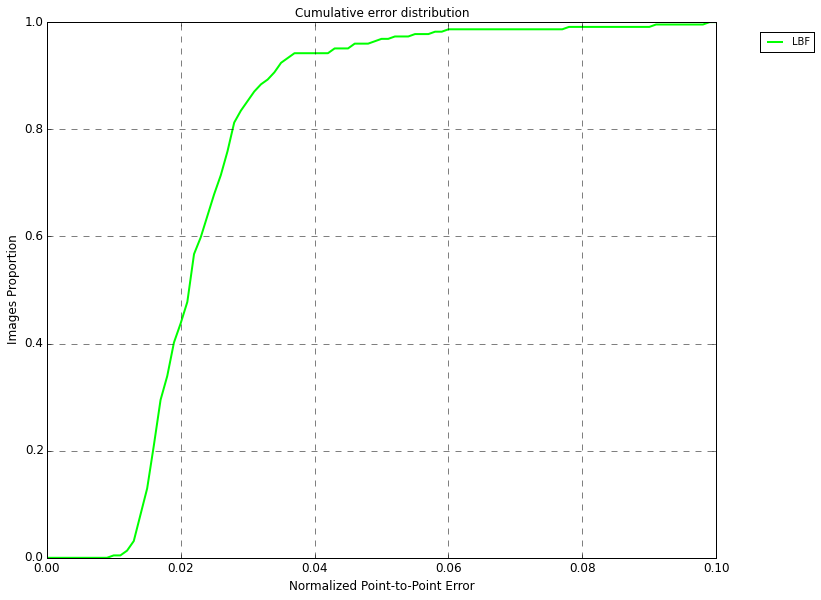

In [30]:
from menpofit.visualize import plot_ced
plot_ced(lbf_fast_finerr)

In [105]:
testset = helen_test
esr_initerr, esr_finerr, _, esr_shapes = test_model(esr_model, testset, 5)
ert_initerr, ert_finerr, _, ert_shapes = test_model(ert_model, testset, 5)
lbf_fast_initerr, lbf_fast_finerr, _, lbf_fast_shapes = test_model(lbf_fast_model, testset, 1)
print "ESR Mean final error: {}".format(np.mean(esr_finerr))
print "ERT Mean final error: {}".format(np.mean(ert_finerr))
print "LBF-fast Mean final error: {}".format(np.mean(lbf_fast_finerr))

330/330ng face 329/330ESR Mean final error: 0.0264447843989
ERT Mean final error: 0.0259486128112
LBF-fast Mean final error: 0.0268462358782


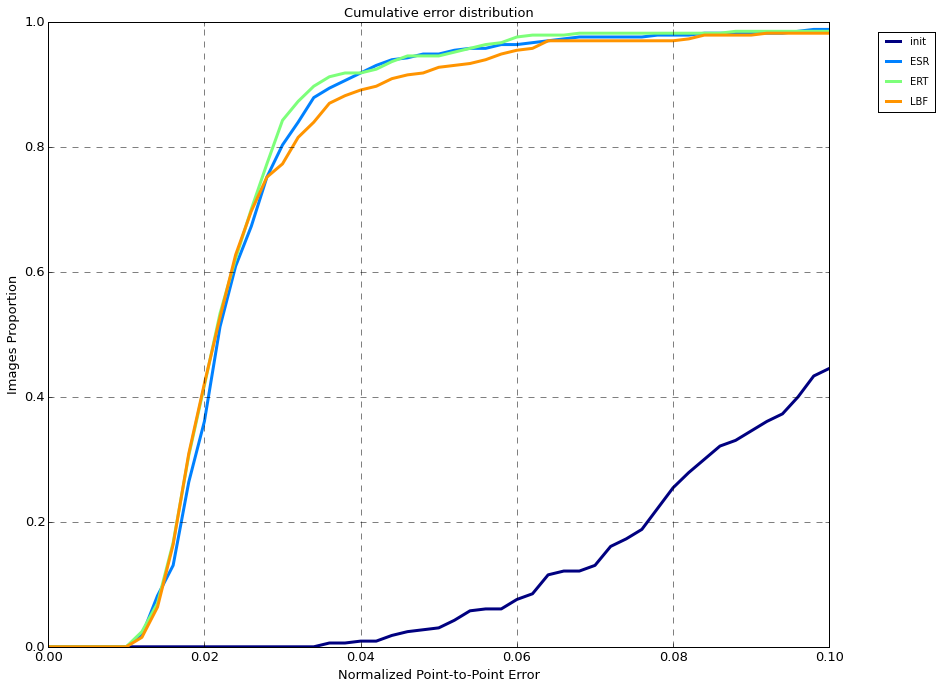

In [120]:
plot_ced([esr_initerr, esr_finerr, ert_finerr, lbf_fast_finerr])

In [115]:
testset = lfpw_test
esr_initerr_lfpw, esr_finerr_lfpw, _, _ = test_model(esr_model, testset, 5)
ert_initerr_lfpw, ert_finerr_lfpw, _, _ = test_model(ert_model, testset, 5)
lbf_fast_initerr_lfpw, lbf_fast_finerr_lfpw, _, _ = test_model(lbf_fast_model, testset, 1)
print "ESR Mean final error: {}".format(np.mean(esr_finerr_lfpw))
print "ERT Mean final error: {}".format(np.mean(ert_finerr_lfpw))
print "LBF-fast Mean final error: {}".format(np.mean(lbf_fast_finerr_lfpw))

224/224ng face 223/224ESR Mean final error: 0.0234134630791
ERT Mean final error: 0.0221381220762
LBF-fast Mean final error: 0.0234881140285


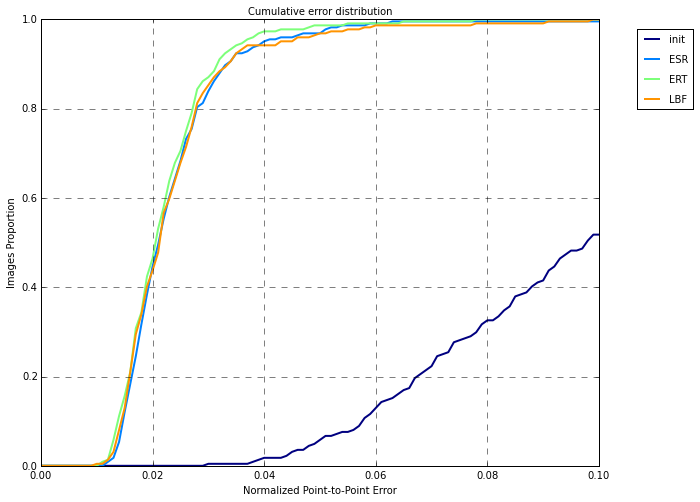

In [118]:
plot_ced([esr_initerr_lfpw, esr_finerr_lfpw, ert_finerr_lfpw, lbf_fast_finerr_lfpw])

In [130]:
np.array(esr_finerr)

array([ 0.01779597,  0.04371473,  0.02716165,  0.0123992 ,  0.05062899,
        0.01987197,  0.01577982,  0.0204431 ,  0.02940782,  0.02081472,
        0.03246655,  0.02407153,  0.02568017,  0.01672935,  0.03725349,
        0.05696922,  0.02451197,  0.02564323,  0.02196374,  0.0157632 ,
        0.03988404,  0.02825826,  0.02274409,  0.02319358,  0.03434073,
        0.0197609 ,  0.02889168,  0.01818251,  0.0210034 ,  0.02019764,
        0.01191617,  0.01927971,  0.01464399,  0.02614835,  0.01467068,
        0.02135292,  0.02688524,  0.0202704 ,  0.02095779,  0.03210673,
        0.01606498,  0.0183054 ,  0.0278893 ,  0.0199867 ,  0.02775859,
        0.01073692,  0.02288831,  0.03101142,  0.02668166,  0.04191728,
        0.03348635,  0.01760935,  0.03658279,  0.0246106 ,  0.02679804,
        0.03105976,  0.01520805,  0.02341579,  0.0279519 ,  0.03530289,
        0.03923976,  0.01558873,  0.02428346,  0.02623934,  0.02422327,
        0.03327221,  0.01683121,  0.06493784,  0.02586821,  0.02

In [129]:
np.array(ert_finerr)

array([ 0.01664902,  0.03699565,  0.02609249,  0.01632842,  0.10791756,
        0.01320857,  0.01742769,  0.02144126,  0.02993564,  0.02176183,
        0.0271991 ,  0.02465961,  0.02687206,  0.01652712,  0.06744524,
        0.06113526,  0.02393369,  0.02725447,  0.01945353,  0.01362942,
        0.04319505,  0.02404395,  0.02162623,  0.03564239,  0.0317206 ,
        0.01879724,  0.02573303,  0.01869665,  0.01717236,  0.02033234,
        0.01739837,  0.01723125,  0.01460521,  0.02320301,  0.01533743,
        0.02118221,  0.0289204 ,  0.02090835,  0.0172693 ,  0.02129251,
        0.01722295,  0.01485927,  0.02432529,  0.01481526,  0.02527312,
        0.01191869,  0.02030142,  0.02884387,  0.02633476,  0.05686986,
        0.02579529,  0.02924407,  0.04247004,  0.03022364,  0.02852123,
        0.02923754,  0.0193126 ,  0.02291639,  0.02721781,  0.03428562,
        0.0306342 ,  0.01327716,  0.02600783,  0.02691875,  0.02213268,
        0.03347219,  0.01285892,  0.04410256,  0.0237566 ,  0.02

In [128]:
np.array(lbf_fast_finerr)

array([ 0.01666727,  0.03942364,  0.02403543,  0.01474697,  0.12350088,
        0.01338946,  0.0165314 ,  0.01873095,  0.03388807,  0.02309576,
        0.02589334,  0.02468165,  0.02296541,  0.0150485 ,  0.06214587,
        0.10439298,  0.03408694,  0.0261279 ,  0.02029534,  0.01377824,
        0.03705636,  0.02471387,  0.0203823 ,  0.08161052,  0.03153079,
        0.01882238,  0.02954927,  0.02517823,  0.01950761,  0.01582148,
        0.01576291,  0.01737909,  0.01762653,  0.02526043,  0.01421521,
        0.02308985,  0.02732142,  0.02151748,  0.01479432,  0.03310975,
        0.01509317,  0.01675762,  0.03310932,  0.01750911,  0.02681348,
        0.01157069,  0.02161593,  0.02786069,  0.03059276,  0.05709749,
        0.02088069,  0.02567281,  0.0494823 ,  0.02967351,  0.02630272,
        0.02116305,  0.01699745,  0.02370633,  0.02209466,  0.0375928 ,
        0.03517598,  0.01486341,  0.02480253,  0.02321619,  0.02354561,
        0.03468997,  0.01653067,  0.06107015,  0.02251674,  0.02

In [138]:
reload(facefit.test.end2end)

<module 'facefit.test.end2end' from '/Users/andrejm/Google Drive/Work/BEng project/beng/facefit/test/end2end.py'>

In [139]:
from facefit.test.end2end import test_model

In [140]:
testset = helen_test
esr_mean_stages_helen = test_model(esr_model, testset, 5)
ert_mean_stages_helen = test_model(ert_model, testset, 5)
lbf_mean_stages = test_model(lbf_fast_model, testset, 1)

Detecting face 329/330

In [141]:
testset = lfpw_test
esr_mean_stages_lfpw = test_model(esr_model, testset, 5)
ert_mean_stages_lfpw = test_model(ert_model, testset, 5)
lbf_mean_stages_lfpw = test_model(lbf_fast_model, testset, 1)

Detecting face 223/224

In [134]:
np.array(esr_mean_stages_helen).shape

(4, 330)

In [142]:
img = testset[0]

In [144]:
import menpofit

In [145]:
face_detector = menpodetect.load_dlib_frontal_face_detector()

In [146]:
bbox = face_detector(img)

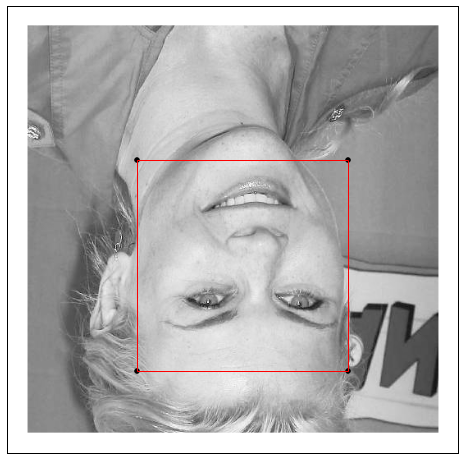

In [148]:
img.view()
bbox[0].view()

In [156]:
%timeit esr_model.apply(img, (bbox, 1, None))

10 loops, best of 3: 38.4 ms per loop


In [158]:
%timeit ert_model.apply(img, (bbox, 1, None))

1 loops, best of 3: 110 ms per loop


In [163]:
%timeit lbf_fast_model.apply(img, (bbox, 1, None))

10 loops, best of 3: 73.5 ms per loop


In [164]:
im = mio.import_builtin_asset('lenna.png')

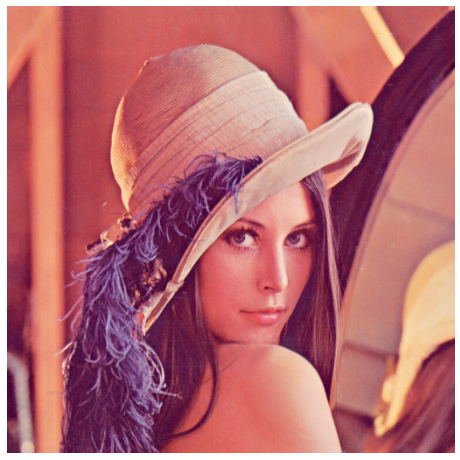

In [169]:
im.view()

In [181]:
img = mio.import_image("../../lfpw/trainset/image_0010.png")

In [182]:
img.crop_to_landmarks_proportion_inplace(0.5)

In [183]:
img = img.as_greyscale(mode='average')

In [195]:
shape.points += [-20]

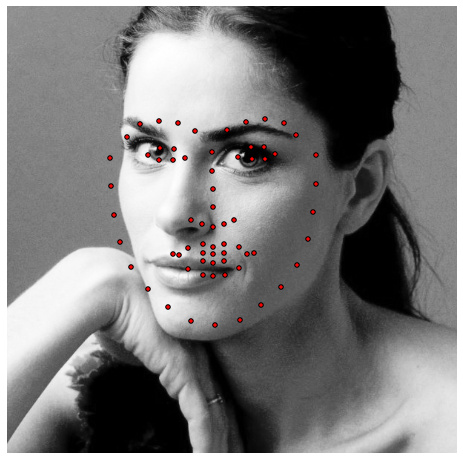

In [196]:
shape.view()
img.view()

In [178]:
shape = util.fit_shape_to_box(esr_model.mean_shape, face_detector(img)[0])